## 東京都の人口マップ（２０１５＆２０２０）

必要なライブラリをインポート

In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

mpl.rc('font',family='Hiragino Maru Gothic Pro')

ファイルの読み込み

In [5]:
tokyomesh1=gpd.read_file('data2/SDDSWS5339')
tokyomesh2=gpd.read_file('data2/SDDSWS5338')

ファイルの連結

In [6]:
tokyomesh= gpd.pd.concat([tokyomesh1,tokyomesh2])

メッシュのみのマップ

<Axes: >

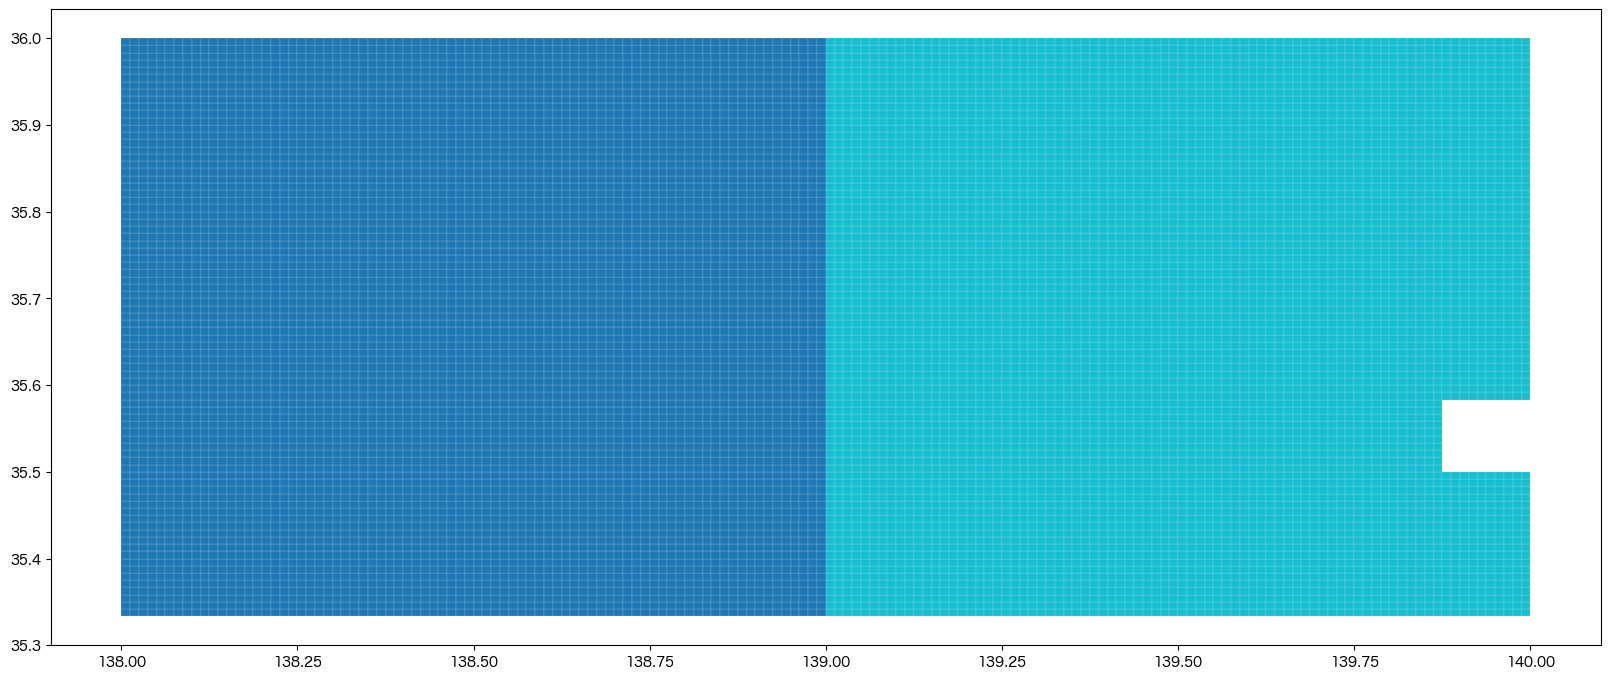

In [7]:
tokyomesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1,column='MESH1_ID')

データファイルの読み込み

In [12]:
tokyodata1=pd.read_csv('data2/tblT000846S5339.txt',encoding='cp932')
tokyodata2=pd.read_csv('data2/tblT000846S5338.txt',encoding='cp932')
tokyodata3=pd.read_csv('data2/tblT001100S5339.txt',encoding='cp932')
tokyodata4=pd.read_csv('data2/tblT001100S5338.txt',encoding='cp932')

データの余計な部分を削除

In [13]:
tokyodata1=tokyodata1[1:]
tokyodata2=tokyodata2[1:]
tokyodata3=tokyodata3[1:]
tokyodata4=tokyodata4[1:]

確認

In [10]:
tokyodata1

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T000846001,T000846002,T000846003,T000846004,T000846005,T000846006,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
1,53390005.0,0.0,NaN,NaN,64,33,31,6,5,1,...,3,0,18,12,6,1,16,0,2,4
2,53390006.0,2.0,53390007.0,NaN,3,1,2,*,*,*,...,*,*,*,*,*,*,*,*,*,*
3,53390007.0,1.0,NaN,53390006,179,83,96,14,6,8,...,6,2,47,23,24,3,44,0,6,6
4,53390008.0,0.0,NaN,NaN,820,414,406,118,66,52,...,10,4,230,177,53,26,163,2,24,43
5,53390009.0,0.0,NaN,NaN,3732,1791,1941,532,269,263,...,34,20,1070,902,168,143,633,6,97,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4703,53397795.0,0.0,NaN,NaN,282,140,142,34,18,16,...,6,6,68,43,25,9,49,0,8,6
4704,53397796.0,0.0,NaN,NaN,248,125,123,41,21,20,...,6,3,63,43,20,11,49,1,7,11
4705,53397797.0,0.0,NaN,NaN,65,34,31,10,5,5,...,0,3,14,9,5,3,8,1,1,2
4706,53397798.0,0.0,NaN,NaN,584,285,299,57,25,32,...,6,5,168,124,44,13,117,0,14,32


＊を読み取れる形に変更

In [14]:
tokyodata1=tokyodata1.replace('*',np.nan)
tokyodata2=tokyodata2.replace('*',np.nan)
tokyodata3=tokyodata3.replace('*',np.nan)
tokyodata4=tokyodata4.replace('*',np.nan)

2020と2015ごとにデータをまとめる

In [15]:
tokyodata2015=pd.concat([tokyodata1,tokyodata2])
tokyodata2020=pd.concat([tokyodata3,tokyodata4])

いらないカラムのを削除

In [16]:
columns_to_delete=['HTKSYORI','HTKSAKI','GASSAN']
tokyodata2015=tokyodata2015.drop(columns=columns_to_delete)
tokyodata2020=tokyodata2020.drop(columns=columns_to_delete)

キーコードを基準にデータのマージ

In [17]:
tokyodata = pd.merge(tokyodata2020,tokyodata2015,on='KEY_CODE')

データのデータタイプの変更

In [18]:
tokyodata[tokyodata.columns[1:]]=tokyodata[tokyodata.columns[1:]].astype(float)

メッシュデータのデータタイプの変更

In [19]:
tokyomesh['KEY_CODE']=tokyomesh['KEY_CODE'].astype(float)

メッシュデータと人口のデータのマージ

In [20]:
tokyomesh = tokyomesh.merge(tokyodata, on='KEY_CODE')

メルカトルの指定

In [21]:
tokyomesh=tokyomesh.to_crs(3857)

2020の人口のメッシュマップ

<Axes: >

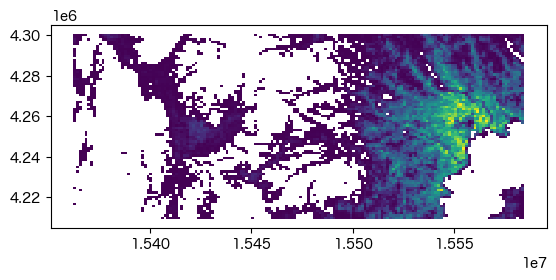

In [22]:
tokyomesh.plot(column='T001100001')

2015の人口のメッシュマップ

<Axes: >

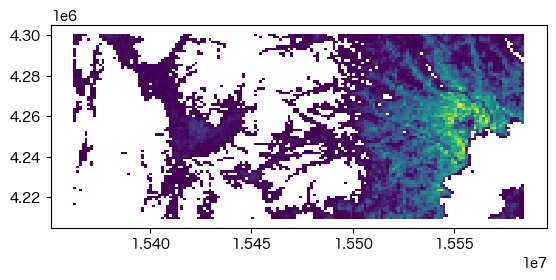

In [23]:
tokyomesh.plot(column='T000846001')

余白の削除、判例の数値の指定、地図の並列

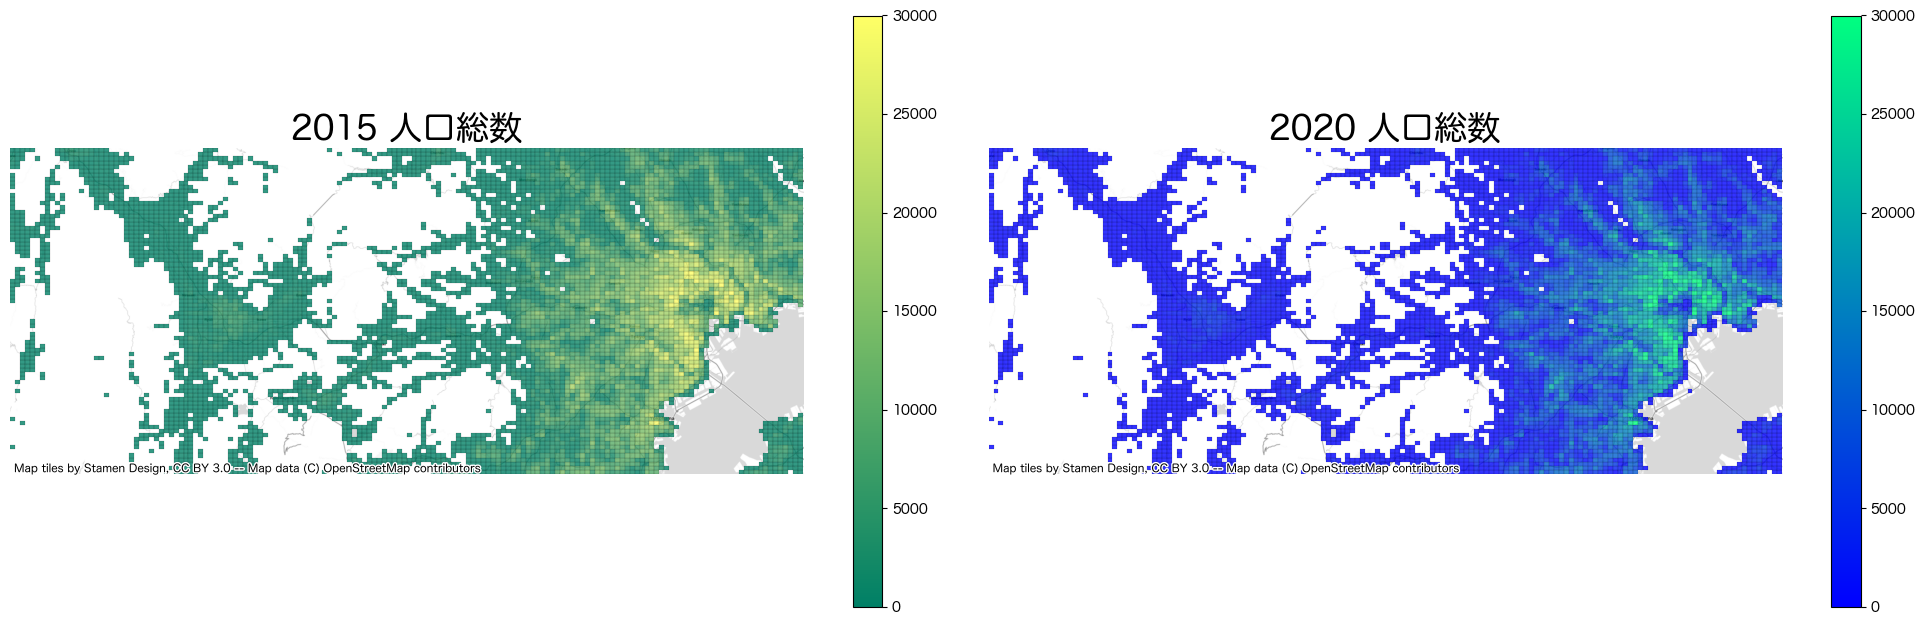

In [48]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) 

tokyomesh.plot(ax = ax[0], 
    column='T000846001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='summer',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=30000)


tokyomesh.plot(ax = ax[1], 
    column='T001100001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='winter',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=30000)

ax[0].axis('off') 
ax[1].axis('off') 

ax[0].set_title('2015 人口総数',fontsize=24); 
ax[1].set_title('2020 人口総数',fontsize=24); 

xmin, ymin, xmax, ymax = tokyomesh.total_bounds

ax[0].set_xlim(xmin, xmax) 
ax[0].set_ylim(ymin, ymax) 
ax[1].set_xlim(xmin, xmax) 
ax[1].set_ylim(ymin, ymax) 

plt.tight_layout()

cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite)
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) 

2020のtop10に絞る

In [37]:
tokyomesh2020=tokyomesh.sort_values(by='T001100001', ascending=False )
tokyomesh2020

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,T001100001,T001100002,T001100003,T001100004,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
1811,53393508.0,5339,35,08,2809,"POLYGON ((15555507.345 4243439.108, 15554115.8...",32706.0,16270.0,16436.0,3018.0,...,32.0,11.0,7005.0,6640.0,365.0,1081.0,4286.0,1972.0,1836.0,1061.0
2461,53394597.0,5339,45,97,3698,"POLYGON ((15554115.851 4265133.078, 15552724.3...",32313.0,15823.0,16490.0,3048.0,...,53.0,13.0,7358.0,6842.0,516.0,1158.0,4428.0,2279.0,1978.0,907.0
2527,53394663.0,5339,46,63,3764,"POLYGON ((15562464.813 4261704.852, 15561073.3...",32279.0,16621.0,15658.0,2859.0,...,87.0,19.0,6874.0,6309.0,565.0,965.0,5262.0,1366.0,2548.0,937.0
2490,53394626.0,5339,46,26,3727,"POLYGON ((15566639.294 4257135.556, 15565247.8...",32210.0,15649.0,16561.0,3216.0,...,48.0,22.0,8589.0,8036.0,553.0,1172.0,5976.0,1312.0,2307.0,1444.0
2388,53394524.0,5339,45,24,3625,"POLYGON ((15549941.370 4257135.556, 15548549.8...",32178.0,16583.0,15595.0,2452.0,...,42.0,13.0,5917.0,5358.0,559.0,831.0,4180.0,2645.0,1944.0,792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,53394040.0,5339,40,40,3141,"POLYGON ((15474800.714 4259419.966, 15473409.2...",1.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4708,53380348.0,5338,03,48,349,"POLYGON ((15416357.981 4213821.997, 15414966.4...",1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5970,53385033.0,5338,50,33,4034,"POLYGON ((15367655.704 4269705.722, 15366264.2...",1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,53390064.0,5339,00,64,65,"POLYGON ((15480366.688 4216097.407, 15478975.1...",1.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2015のtop10に絞る

In [38]:
tokyomesh2015=tokyomesh.sort_values(by='T000846001', ascending=False )
tokyomesh2015

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,T001100001,T001100002,T001100003,T001100004,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
2490,53394626.0,5339,46,26,3727,"POLYGON ((15566639.294 4257135.556, 15565247.8...",32210.0,15649.0,16561.0,3216.0,...,48.0,22.0,8589.0,8036.0,553.0,1172.0,5976.0,1312.0,2307.0,1444.0
2461,53394597.0,5339,45,97,3698,"POLYGON ((15554115.851 4265133.078, 15552724.3...",32313.0,15823.0,16490.0,3048.0,...,53.0,13.0,7358.0,6842.0,516.0,1158.0,4428.0,2279.0,1978.0,907.0
1811,53393508.0,5339,35,08,2809,"POLYGON ((15555507.345 4243439.108, 15554115.8...",32706.0,16270.0,16436.0,3018.0,...,32.0,11.0,7005.0,6640.0,365.0,1081.0,4286.0,1972.0,1836.0,1061.0
2527,53394663.0,5339,46,63,3764,"POLYGON ((15562464.813 4261704.852, 15561073.3...",32279.0,16621.0,15658.0,2859.0,...,87.0,19.0,6874.0,6309.0,565.0,965.0,5262.0,1366.0,2548.0,937.0
2509,53394645.0,5339,46,45,3746,"POLYGON ((15565247.800 4259419.966, 15563856.3...",30972.0,15128.0,15844.0,3001.0,...,62.0,24.0,7589.0,7052.0,537.0,1076.0,4859.0,1523.0,1892.0,1186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,53383074.0,5338,30,74,2475,"POLYGON ((15369047.198 4251426.620, 15367655.7...",3.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3378,53396190.0,5339,61,90,4891,"POLYGON ((15488715.650 4288015.500, 15487324.1...",1.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4834,53380749.0,5338,07,49,750,"POLYGON ((15473409.220 4213821.997, 15472017.7...",2.0,2.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,53394040.0,5339,40,40,3141,"POLYGON ((15474800.714 4259419.966, 15473409.2...",1.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2020の人口の多い街top10

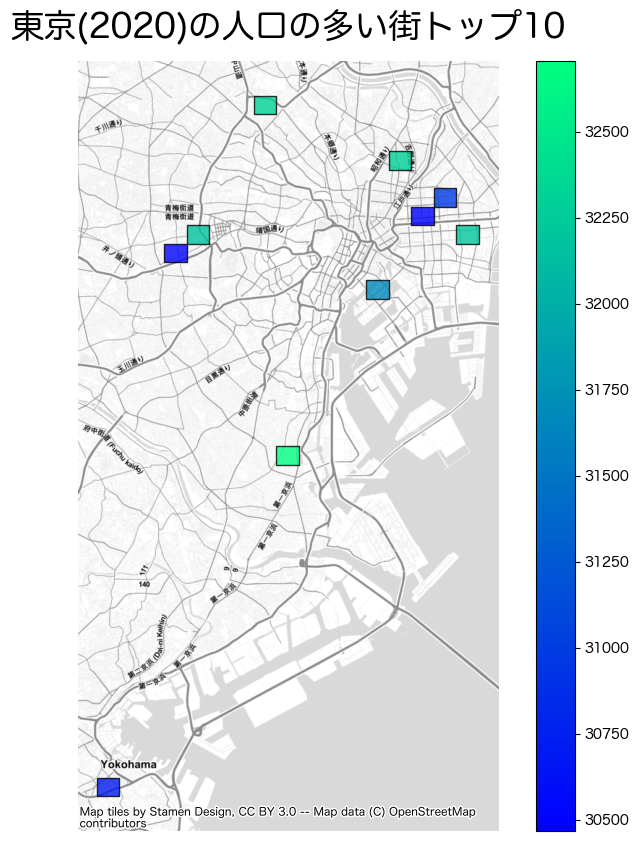

In [50]:
ax = tokyomesh2020.head(10).plot(figsize=(10,10),
         column='T001100001',
         legend=True,
         cmap='winter',
         edgecolor='black',
         linewidth=1,
         alpha=0.8
         )

ax.axis('off')

ax.set_title('東京(2020)の人口の多い街トップ10',fontsize=24);

cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

2015の人口の多い街top10

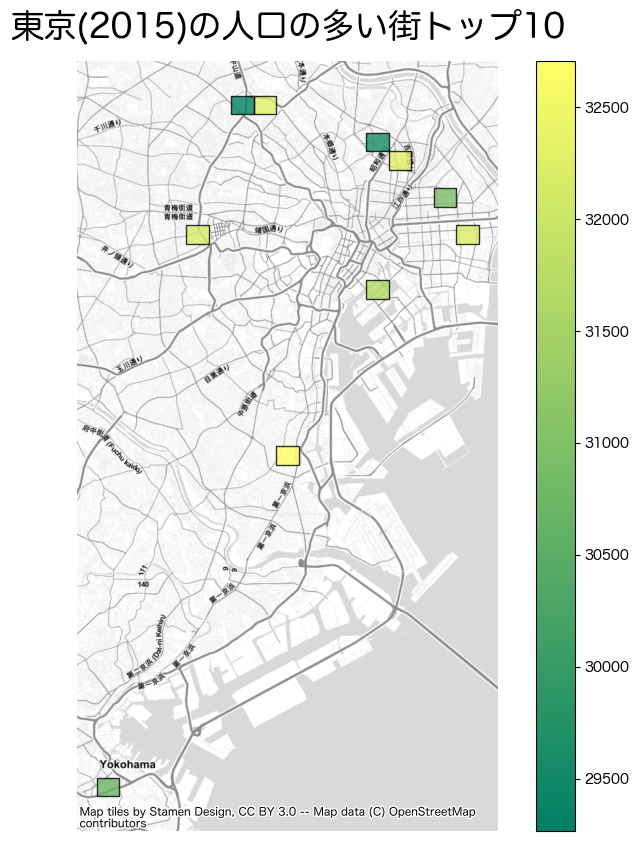

In [46]:
ax = tokyomesh2015.head(10).plot(figsize=(10,10),
         column='T001100001',
         legend=True,
         cmap='summer',
         edgecolor='black',
         linewidth=1,
         alpha=0.8)


ax.axis('off')

ax.set_title('東京(2015)の人口の多い街トップ10',fontsize=24);

cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

### 感想
今回はしっかりと東京のみになるようにグリッドを選択しました。データもうまく出て、結果としてもとてもわかりやすいものになりました。東京でも人があまり住んでいない地区があることにとても驚きました。